In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

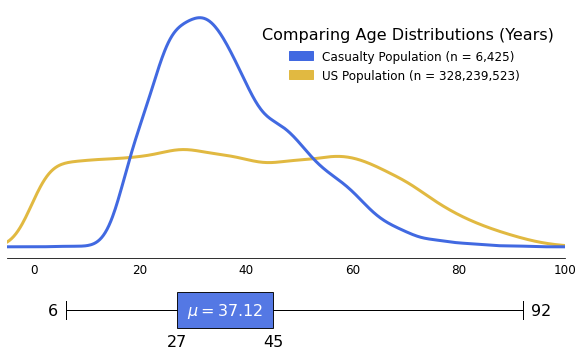

In [2]:
def us_age_distribution(path: str = "./data/age.csv") -> tuple[int, np.ndarray]:
    '''
    create array of integers that represent age distribution of US population.
    array will be used to plot kernel density estimation of US population's age
    '''
    census_age: pd.DataFrame = pd.read_csv(path)
    us_pop: int = sum(census_age.loc[:, "POP"])

    # scale down count to decrease number of data points in us_dist
    SCALE: int = 10000
    us_dist: pd.Series = np.repeat(census_age.loc[:, "AGE"], 
                                           census_age.loc[:, "POP"] / SCALE)

    return  us_pop, us_dist


def compare_age_distributions(us_pop: int, us_dist: pd.Series, casualty_dist: pd.Series) -> None:
    '''
    produces plot that compares the age distribution of the entire US 
    populations and the age distribution of the casualities
    '''

    f, [ax_kde, ax_box] = plt.subplots(2, figsize = (10, 6), 
                                          sharex = True, 
                                          gridspec_kw = {"height_ratios":(0.85, 0.15)})

    ################################################
    ### EDITS TO KERNAL DENSITY ESTIMATION PLOTS ###
    ################################################

    # plot US population age distribution and cauality age distribution
    us_dist.plot.density(ax = ax_kde, linewidth = 3, color = "#E1B941")
    casualty_dist.plot.density(ax = ax_kde, linewidth = 3, color = "#4169E1",)

    # format x-axis of box plot
    ax_kde.set_xlabel("Years", fontsize = 14)
    ax_kde.set_xlim(-5, 100)

    # format ticks of kde plot
    ax_kde.get_yaxis().set_visible(False)
    ax_kde.tick_params(axis = 'x', length = 0)

    # remove border around kde plot
    ax_kde.spines["top"].set_visible(False)
    ax_kde.spines["right"].set_visible(False)
    ax_kde.spines["left"].set_visible(False)

    #########################
    ### EDITS TO BOX PLOT ###
    #########################

    # create box plot
    bp = ax_box.boxplot(casualty_dist.values, 
                        vert = False, 
                        showmeans = False, 
                        patch_artist = True, 
                        widths = 0.8, 
                        whis = 3)

    # color in box of boxplot
    plt.setp(bp["medians"], alpha = 0)
    for patch in bp["boxes"]:
        patch.set(facecolor = "#4169E1", alpha = .9)

    # format ticks of box plot
    ax_box.tick_params(size = 0, labelsize = 12, pad = 12)
    ax_box.xaxis.tick_top()
    ax_box.set_yticks([])

    # remove border around box plot
    [ax_box.spines[s].set_visible(False) for s in ax_box.spines]

    # calculate minimum, lower quartile, upper quartile, and maximum of box plot
    [mi, p25, p75, ma] = np.quantile(casualty_dist.values, [0, 0.25, 0.75, 1]).astype(int)

    # label minimum, lower quartile, upper quartile, and maximum of box plot
    ax_box.text(ma + 1.5, 1, str(ma), fontsize = 16, ha = "left", va = "center")
    ax_box.text(mi - 1.5, 1, str(mi), fontsize = 16, ha = "right", va = "center")
    ax_box.text(p25, .3, str(p25), fontsize = 16, ha = "center", va = "center")
    ax_box.text(p75, .3, str(p75), fontsize = 16, ha = "center", va = "center")

    # label mean of box plot
    x = p75 - (p75 - p25) / 2
    m = round(np.mean(casualty_dist.values), 2)
    ax_box.text(x, 1, "$\mu = $" + str(m), fontsize = 16, ha = "center", va = "center", color = "white")

    #############################
    ### GENERAL EDITS TO PLOT ###
    #############################

    # add title
    ax_kde.text(43, .03, "Comparing Age Distributions (Years)", fontsize = 16)

    # calculate size of each popuatlation
    num_c = '{:,}'.format(len(casualty_dist.values))
    num_us = '{:,}'.format(us_pop)

    # create legend
    casualty_patch = mpatches.Patch(color = "#4169E1", label = "Casualty Population (n = " + num_c + ")")
    us_patch = mpatches.Patch(color = "#E1B941", label = "US Population (n = " + num_us + ")")
    ax_kde.legend(handles = [casualty_patch, us_patch], 
                  prop = {"size": 12}, 
                  frameon = False, 
                  bbox_to_anchor = (.485, 0.87))

    plt.show()

us_pop, us_dist = us_age_distribution()
casualty_dist = pd.read_csv("./data/shooting.csv").loc[:, "age"].dropna()
compare_age_distributions(us_pop, us_dist, casualty_dist)

In [3]:
race = pd.read_csv("./data/race.csv").query("HISP == 0 and RACE > 0 and RACE < 5")
'''
RACE
    0: All races
    1: White alone
    2: Black alone
    3: American Indian and Alaska Native alone
    4: Asian alone
    5: Native Hawaiian and Other Pacific Islander alone
    6: Two or more races
    7: White alone or in combination
    8: Black alone or in combination
    9: American Indian and Alaska Native alone or in combination
    10: Asian alone or in combination
    11: Native Hawaiian and Other Pacific Islander alone or in combination

HISP
    0: Both Hispanic origins
    1: Non Hispanic
    2: Hispanic
'''

shooting = pd.read_csv("./data/shooting.csv").query("race != 'H' and race != 'O'")
'''
race
    W: White, non-Hispanic
    B: Black, non-Hispanic
    A: Asian
    N: Native American
    H: Hispanic
    O: Other
'''



'\nrace\n    W: White, non-Hispanic\n    B: Black, non-Hispanic\n    A: Asian\n    N: Native American\n    H: Hispanic\n    O: Other\n'

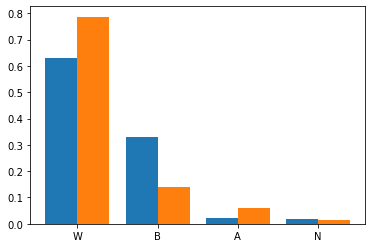

In [4]:
map = pd.DataFrame({'s_key': ['W', 'B', 'A', 'N'],
                    'c_key': [ 1,   2,   4,   3 ]})

shooting_df = pd.DataFrame(shooting.loc[:, "race"].value_counts() / shooting.loc[:, "race"].dropna().size)
census_df = pd.DataFrame(race.loc[:, "POP"] / race.loc[:, "POP"].sum())

data = map.join(shooting_df, on = "s_key").join(census_df, on = "c_key")

y_shooting = data.loc[:, "race"]
y_census = data.loc[:, "POP"]

WIDTH = .4
labels = data.loc[:, "s_key"]
x = np.arange(len(labels))

plt.bar(x - WIDTH / 2, y_shooting, WIDTH)
plt.bar(x + WIDTH / 2, y_census, WIDTH)

plt.xticks(x, labels)

plt.show()